# Assignmnet 2

# 1. k-NN performs worse than Logistic Regression

Для того чтобы найти такой случай, посмотрим на то, как работают 2 алгоритма и в чем их различие. Так, если линейная регрессия,  грубо говоря, проводит линию между 2 множествами, рассекая их на 2 класса, то k-NN -  это метод, который смотрит на соседей того объекта, которому надо приписать класс и определяет его класс по neighbours' plurality vote, т. е. по тому, соседей какого класса к нему больше ближе расположено.

Следовательно, нам нужно создать 2 таких множества, элементы которых были бы расположены близко друг к другу на dimension size = 2, даже ближе к другому классу, чем к своему, но через которые можно было бы провести регрессию. Ну что ж, пОгНаЛи.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [9]:
def pipeline(X, y, c1, c2, y_p, y2_p, yf1, yf2):
    clf1 = c1
    clf2 = c2
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)
    y_p.append(cross_val_score(clf1, X, y, cv=5, scoring='accuracy').mean())
    y2_p.append(cross_val_score(clf2, X, y, cv=5, scoring='accuracy').mean())
    clf1.fit(X_train, y_train)
    r1 = clf1.predict(X_test)
    yf1.append(accuracy_score(r1, y_test))
    clf2.fit(X_train, y_train)
    r2 = clf2.predict(X_test)
    yf2.append(accuracy_score(r2, y_test))
    return y_p, y2_p, yf1, yf2

In [15]:
def generate_dataset(n):
    X = []
    y = []
    X.extend([[x, x] for x in np.linspace(1,1000, n)])
    X.extend([[x, x+0.002] for x in np.linspace(1,1000, n)])
    y.extend([1]*n)
    y.extend([0]*n)
    return X, y

In [21]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)
    y_p.append(cross_val_score(clf1, X, y, cv=5, scoring='accuracy').mean())
    y2_p.append(cross_val_score(clf2, X, y, cv=5, scoring='accuracy').mean())
    clf1.fit(X_train, y_train)
    r1 = clf1.predict(X_test)
    print(accuracy_score(r1, y_test))
    yf1.append(accuracy_score(r1, y_test))
    clf2.fit(X_train, y_train)
    r2 = clf2.predict(X_test)
    print(accuracy_score(r2, y_test))
    yf2.append(accuracy_score(r2, y_test))

0.24
0.49


In [19]:
yf1

[0.16,
 0.23529411764705882,
 0.2549019607843137,
 0.1346153846153846,
 0.21153846153846154,
 0.22641509433962265,
 0.1509433962264151,
 0.2222222222222222,
 0.18518518518518517,
 0.2,
 0.21818181818181817,
 0.21428571428571427,
 0.17857142857142858,
 0.17543859649122806,
 0.2631578947368421,
 0.22413793103448276,
 0.15517241379310345,
 0.1016949152542373,
 0.11864406779661017,
 0.16666666666666666,
 0.21666666666666667,
 0.13114754098360656,
 0.14754098360655737,
 0.14516129032258066,
 0.25806451612903225,
 0.1746031746031746,
 0.1746031746031746,
 0.1875,
 0.203125,
 0.16923076923076924,
 0.1076923076923077,
 0.21212121212121213,
 0.22727272727272727,
 0.1791044776119403,
 0.14925373134328357,
 0.1323529411764706,
 0.14705882352941177,
 0.18840579710144928,
 0.2028985507246377,
 0.21428571428571427,
 0.22857142857142856,
 0.22535211267605634,
 0.19718309859154928,
 0.19444444444444445,
 0.1388888888888889,
 0.1917808219178082,
 0.2054794520547945,
 0.16216216216216217,
 0.18918918918

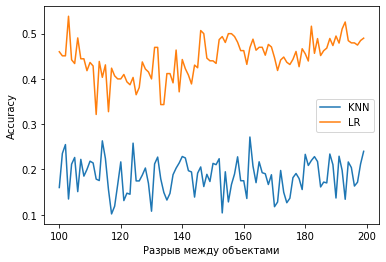

In [23]:
x_p, y_p, y2_p, yf1, yf2 = [],[],[],[],[]
for i in range (100, 200):
    X, y = generate_dataset(i)
    my_knn = KNeighborsClassifier()
    my_log = LogisticRegression(solver='liblinear')
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)
    y_p.append(cross_val_score(my_knn, X, y, cv=5, scoring='accuracy').mean())
    y2_p.append(cross_val_score(my_log, X, y, cv=5, scoring='accuracy').mean())
    my_knn.fit(X_train, y_train)
    r1 = my_knn.predict(X_test)
    yf1.append(accuracy_score(r1, y_test))
    my_log.fit(X_train, y_train)
    r2 = my_log.predict(X_test)
    yf2.append(accuracy_score(r2, y_test))
    x_p.append(i)
plt.plot( x_p, yf1, x_p, yf2)
plt.legend(['KNN','LR'])
plt.xlabel('Разрыв между объектами')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# сделать на одном отступе (большом), нарисовать графичек точек, после генераци датасета и попробовать убрать параметр с логической